# 8 - 1

In [1]:
import pandas as pd

df = pd.read_csv('data/gapminder.tsv', sep = '\t')

In [2]:
avg_life_exp_by_year = df.groupby('year')['lifeExp'].mean()
print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [3]:
years = df.year.unique()
print(years)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [4]:
y1952 = df.loc[df.year == 1952, :]
print(y1952)

                 country continent  year  lifeExp       pop    gdpPercap
0            Afghanistan      Asia  1952   28.801   8425333   779.445314
12               Albania    Europe  1952   55.230   1282697  1601.056136
24               Algeria    Africa  1952   43.077   9279525  2449.008185
36                Angola    Africa  1952   30.015   4232095  3520.610273
48             Argentina  Americas  1952   62.485  17876956  5911.315053
...                  ...       ...   ...      ...       ...          ...
1644             Vietnam      Asia  1952   40.412  26246839   605.066492
1656  West Bank and Gaza      Asia  1952   43.160   1030585  1515.592329
1668         Yemen, Rep.      Asia  1952   32.548   4963829   781.717576
1680              Zambia    Africa  1952   42.038   2672000  1147.388831
1692            Zimbabwe    Africa  1952   48.451   3080907   406.884115

[142 rows x 6 columns]


In [5]:
y1952_mean = y1952['lifeExp'].mean()
print(y1952_mean)

49.057619718309866


In [6]:
continent_describe = df.groupby('continent')['lifeExp'].describe()
print(continent_describe)

           count       mean        std     min       25%      50%       75%  \
continent                                                                     
Africa     624.0  48.865330   9.150210  23.599  42.37250  47.7920  54.41150   
Americas   300.0  64.658737   9.345088  37.579  58.41000  67.0480  71.69950   
Asia       396.0  60.064903  11.864532  28.801  51.42625  61.7915  69.50525   
Europe     360.0  71.903686   5.433178  43.585  69.57000  72.2410  75.45050   
Oceania     24.0  74.326208   3.795611  69.120  71.20500  73.6650  77.55250   

              max  
continent          
Africa     76.442  
Americas   80.653  
Asia       82.603  
Europe     81.757  
Oceania    81.235  


In [7]:
import numpy as np

cont_le_agg = df.groupby('continent')['lifeExp'].agg(np.mean)
print(cont_le_agg)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


In [10]:
def my_mean(values):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    return sum / n

In [11]:
agg_my_mean = df.groupby('year')['lifeExp'].agg(my_mean)
print(agg_my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [12]:
def my_mean_diff(values, diff_value):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    mean = sum / n
    return(mean - diff_value)

In [13]:
global_mean = df['lifeExp'].mean()
print(global_mean)

59.474439366197174


In [14]:
agg_mean_diff = (
    df
    .groupby('year')
    ['lifeExp']
    .agg(my_mean_diff, diff_value = global_mean)
)

print(agg_mean_diff)


year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


In [15]:
gdf = (
    df
    .groupby('year')
    ['lifeExp']
    .agg([np.count_nonzero, np.mean, np.std])
)

print(gdf)

      count_nonzero       mean        std
year                                     
1952            142  49.057620  12.225956
1957            142  51.507401  12.231286
1962            142  53.609249  12.097245
1967            142  55.678290  11.718858
1972            142  57.647386  11.381953
1977            142  59.570157  11.227229
1982            142  61.533197  10.770618
1987            142  63.212613  10.556285
1992            142  64.160338  11.227380
1997            142  65.014676  11.559439
2002            142  65.694923  12.279823
2007            142  67.007423  12.073021


In [16]:
gdf_dict = df.groupby('year').agg(
    {
        'lifeExp' : 'mean',
        'pop' : 'median',
        'gdpPercap' : 'median'
    }
)

print(gdf_dict)

        lifeExp         pop    gdpPercap
year                                    
1952  49.057620   3943953.0  1968.528344
1957  51.507401   4282942.0  2173.220291
1962  53.609249   4686039.5  2335.439533
1967  55.678290   5170175.5  2678.334740
1972  57.647386   5877996.5  3339.129407
1977  59.570157   6404036.5  3798.609244
1982  61.533197   7007320.0  4216.228428
1987  63.212613   7774861.5  4280.300366
1992  64.160338   8688686.5  4386.085502
1997  65.014676   9735063.5  4781.825478
2002  65.694923  10372918.5  5319.804524
2007  67.007423  10517531.0  6124.371108


In [17]:
gdf = (
    df
    .groupby('year')
    ['lifeExp']
    .agg(
        [
            np.count_nonzero,
            np.mean,
            np.std,
        ]
    )
    .rename(
        columns = {
            'count_nonzero' : 'count',
            'mean' : 'avg',
            'std' : 'ste_dev',
        }
    )
    .reset_index()
)

print(gdf)

    year  count        avg    ste_dev
0   1952    142  49.057620  12.225956
1   1957    142  51.507401  12.231286
2   1962    142  53.609249  12.097245
3   1967    142  55.678290  11.718858
4   1972    142  57.647386  11.381953
5   1977    142  59.570157  11.227229
6   1982    142  61.533197  10.770618
7   1987    142  63.212613  10.556285
8   1992    142  64.160338  11.227380
9   1997    142  65.014676  11.559439
10  2002    142  65.694923  12.279823
11  2007    142  67.007423  12.073021


# 8 - 2

In [18]:
def my_zscore(x):
    return((x - x.mean() / x.std()))

In [19]:
transform_z = df.groupby('year')['lifeExp'].transform(my_zscore)
print(transform_z)

0       24.788420
1       26.120881
2       27.565475
3       29.268830
4       31.023194
          ...    
1699    56.362851
1700    54.662368
1701    41.184620
1702    34.639173
1703    37.936821
Name: lifeExp, Length: 1704, dtype: float64


In [20]:
print(df.shape)

(1704, 6)


In [21]:
print(transform_z.shape)

(1704,)


In [22]:
from scipy.stats import zscore

In [23]:
sp_z_grouped = df.groupby('year')['lifeExp'].transform(zscore)

In [25]:
sp_z_nogroup = zscore(df['lifeExp'])

In [26]:
print(transform_z.head())

0    24.788420
1    26.120881
2    27.565475
3    29.268830
4    31.023194
Name: lifeExp, dtype: float64


In [28]:
print(sp_z_grouped.head())

0   -1.662719
1   -1.737377
2   -1.792867
3   -1.854699
4   -1.900878
Name: lifeExp, dtype: float64


In [29]:
import seaborn as sns
import numpy as np

np.random.seed(42)

tips_10 = sns.load_dataset('tips').sample(10)

In [31]:
tips_10.loc[
    np.random.permutation(tips_10.index)[:4],
    'total_bill'
] = np.NaN

print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153         NaN  2.00    Male     No   Sun  Dinner     4
211         NaN  5.16    Male    Yes   Sat  Dinner     4
198         NaN  2.00  Female    Yes  Thur   Lunch     2
176         NaN  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [32]:
count_sex = tips_10.groupby('sex').count()
print(count_sex)

        total_bill  tip  smoker  day  time  size
sex                                             
Male             4    7       7    7     7     7
Female           2    3       3    3     3     3


In [34]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

total_bill_group_mean = (
    tips_10
    .groupby('sex')
    .total_bill
    .transform(fill_na_mean)
)

In [35]:
tips_10['fill_total_bill'] = total_bill_group_mean

In [36]:
print(tips_10[['sex', 'total_bill', 'fill_total_bill']])

        sex  total_bill  fill_total_bill
24     Male       19.82          19.8200
6      Male        8.77           8.7700
153    Male         NaN          17.9525
211    Male         NaN          17.9525
198  Female         NaN          13.9300
176    Male         NaN          17.9525
192    Male       28.44          28.4400
124  Female       12.48          12.4800
9      Male       14.78          14.7800
101  Female       15.38          15.3800


# 8 - 3

In [37]:
tips = sns.load_dataset('tips')
print(tips.shape)

(244, 7)


In [38]:
print(tips['size'].value_counts())

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


In [39]:
tips_filtered = (
    tips
    .groupby('size')
    .filter(lambda x : x['size'].count() > 30)
)

In [40]:
print(tips_filtered.shape)

(231, 7)


In [41]:
print(tips_filtered['size'].value_counts())

size
2    156
3     38
4     37
Name: count, dtype: int64


# 8 - 4

In [42]:
tips_10 = sns.load_dataset('tips').sample(10, random_state = 42)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [43]:
grouped = tips_10.groupby('sex')
print(grouped)

In [44]:
print(grouped.groups)

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}


In [45]:
avgs = grouped.mean(numeric_only = True)
print(avgs)

        total_bill       tip      size
sex                                   
Male         20.02  2.875714  2.571429
Female       13.62  2.506667  2.000000


In [46]:
print(tips_10.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [47]:
female = grouped.get_group('Female')
print(female)

     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [48]:
for sex_group in grouped:
    print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [49]:
print(grouped[0])

KeyError: 'Column not found: 0'

In [51]:
for sex_group in grouped:
    print(f'the type is : {type(sex_group)}\n')
    print(f'the length is : {len(sex_group)}\n')
          
    first_element = sex_group[0]
    print(f'the first element is : {first_element}\n')
          
    print(f'it has a type of : {type(sex_group[0])}\n')
          
    second_element = sex_group[1]
    print(f'the second element is : \n{second_element}\n')
          
    print(f'it has a type of : {type(second_element)}\n')
          
    print(f'what we have:')
    print(sex_group)
          
    break

the type is : <class 'tuple'>

the length is : 2

the first element is : Male

it has a type of : <class 'str'>

the second element is : 
     total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

it has a type of : <class 'pandas.core.frame.DataFrame'>

what we have:
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       

In [52]:
bill_sex_time = tips_10.groupby(['sex', 'time'])

group_avg = bill_sex_time.mean(numeric_only = True)

In [53]:
print(type(group_avg))

<class 'pandas.core.frame.DataFrame'>


In [54]:
print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


In [55]:
print(group_avg.columns)

Index(['total_bill', 'tip', 'size'], dtype='object')


In [56]:
print(group_avg.index)

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


In [57]:
group_method = tips_10.groupby(['sex',
                               'time']).mean(numeric_only = True).reset_index()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


In [59]:
group_param = tips_10.groupby(['sex', 'time'],
                             as_index = False).mean(numeric_only = True)
print(group_param)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


# 8 - 5

In [61]:
intv_df = pd.read_csv('data/epi_sim.zip')
print(intv_df)

         ig_type  intervened        pid  rep  sid        tr
0              3          40  294524448    1  201  0.000135
1              3          40  294571037    1  201  0.000135
2              3          40  290699504    1  201  0.000135
3              3          40  288354895    1  201  0.000135
4              3          40  292271290    1  201  0.000135
...          ...         ...        ...  ...  ...       ...
9434648        2          87  345636694    2  201  0.000166
9434649        3          87  295125214    2  201  0.000166
9434650        2          89  292571119    2  201  0.000166
9434651        3          89  292528142    2  201  0.000166
9434652        2          95  291956763    2  201  0.000166

[9434653 rows x 6 columns]


In [62]:
count_only = (
    intv_df
    .groupby(['rep', 'intervened', 'tr'])
    ['ig_type']
    .count()
)

print(count_only)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
                            ..
2    193         0.000135    1
                 0.000152    1
     195         0.000135    1
     198         0.000166    1
     199         0.000135    1
Name: ig_type, Length: 1196, dtype: int64


In [63]:
print(type(count_only))

<class 'pandas.core.series.Series'>


In [64]:
print(count_only.index)

MultiIndex([(0,   8, 0.000166),
            (0,   9, 0.000152),
            (0,   9, 0.000166),
            (0,  10, 0.000152),
            (0,  10, 0.000166),
            (0,  12, 0.000152),
            (0,  12, 0.000166),
            (0,  13, 0.000152),
            (0,  13, 0.000166),
            (0,  14, 0.000152),
            ...
            (2, 187, 0.000152),
            (2, 187, 0.000166),
            (2, 189, 0.000135),
            (2, 189, 0.000152),
            (2, 190, 0.000166),
            (2, 193, 0.000135),
            (2, 193, 0.000152),
            (2, 195, 0.000135),
            (2, 198, 0.000166),
            (2, 199, 0.000135)],
           names=['rep', 'intervened', 'tr'], length=1196)


In [65]:
count_mean = count_only.groupby(level = [0, 1, 2]).mean()
print(count_mean.head())

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
Name: ig_type, dtype: float64


In [66]:
count_mean = (
    intv_df
    .groupby(['rep', 'intervened', 'tr'])['ig_type']
    .count()
    .groupby(level = [0, 1, 2])
    .mean()
)
print(count_mean.head())

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
Name: ig_type, dtype: float64


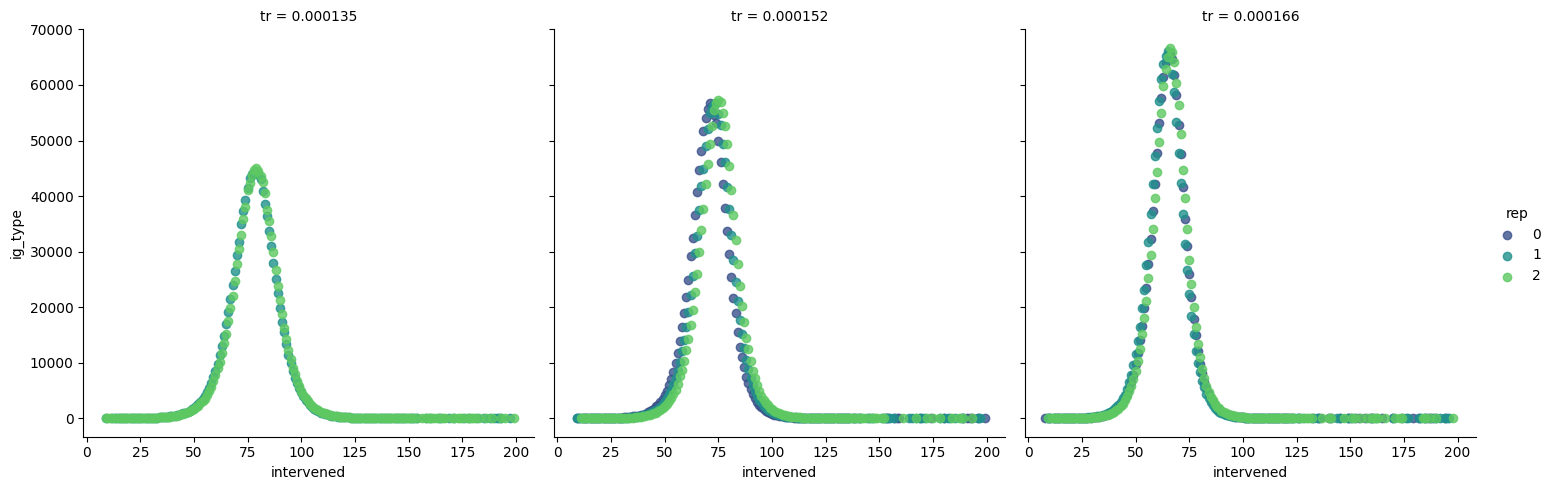

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.lmplot(
    data = count_mean.reset_index(),
    x = 'intervened',
    y = 'ig_type',
    hue = 'rep',
    col = 'tr',
    fit_reg = False,
    palette = 'viridis'
)

plt.show()

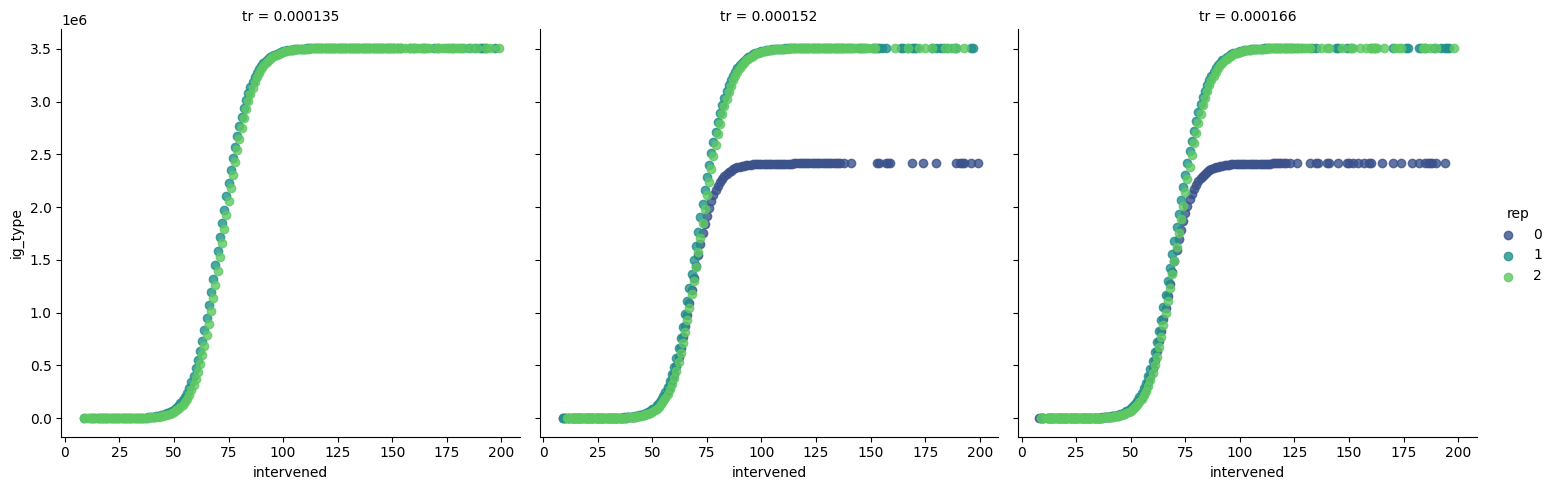

In [69]:
cumulative_count = (
    intv_df
    .groupby(['rep', 'intervened', 'tr'])['ig_type']
    .count()
    .groupby(level = ['rep'])
    .cumsum()
    .reset_index()
)

fig = sns.lmplot(
    data = cumulative_count,
    x = 'intervened',
    y = 'ig_type',
    hue = 'rep',
    col = 'tr',
    fit_reg = False,
    palette = 'viridis'
)

plt.show()